In [2270]:
import pandas as pd
import numpy as np

In [2271]:
original_gas_price_dt = pd.read_csv(r'..\\..\\DataSet\\2004-2021.tsv', sep='\t')
is_gas = original_gas_price_dt['PRODUTO'] == "GASOLINA COMUM"
df_gas = original_gas_price_dt[is_gas]

is_reg = df_gas['REGIÃO'] == "SUDESTE"
df_gas = df_gas[is_reg]

is_est = df_gas['ESTADO'] == "SAO PAULO"
df_gas = df_gas[is_est]

df_gas.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
12087,2004-05-09,2004-05-15,SUDESTE,SAO PAULO,GASOLINA COMUM,4107,R$/l,1.891,0.101,1.570,2.399,0.235,0.053,1.656,0.064,1.38,1.944,0.039
12114,2004-05-16,2004-05-22,SUDESTE,SAO PAULO,GASOLINA COMUM,4133,R$/l,1.888,0.101,1.540,2.220,0.233,0.053,1.655,0.063,1.38,1.9319,0.038
12141,2004-05-23,2004-05-29,SUDESTE,SAO PAULO,GASOLINA COMUM,4139,R$/l,1.894,0.095,1.570,2.399,0.234,0.050,1.66,0.065,1.39,1.9291,0.039
12168,2004-05-30,2004-06-05,SUDESTE,SAO PAULO,GASOLINA COMUM,4139,R$/l,1.912,0.094,1.529,2.199,0.235,0.049,1.677,0.068,1.39,1.9733,0.041
12195,2004-06-06,2004-06-12,SUDESTE,SAO PAULO,GASOLINA COMUM,4138,R$/l,1.919,0.088,1.580,2.399,0.231,0.046,1.688,0.063,1.41,2.0946,0.037


In [2272]:
df_gas = df_gas.drop(['PREÇO MÉDIO DISTRIBUIÇÃO',
                          'DESVIO PADRÃO DISTRIBUIÇÃO',
                          'PREÇO MÍNIMO DISTRIBUIÇÃO',
                          'PREÇO MÁXIMO DISTRIBUIÇÃO',
                          'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
                          'DATA FINAL',
                          'PRODUTO',
                          'ESTADO',
                          'DESVIO PADRÃO REVENDA',
                          'PREÇO MÍNIMO REVENDA',
                          'PREÇO MÁXIMO REVENDA',
                          'COEF DE VARIAÇÃO REVENDA',
                          'REGIÃO',
                          'NÚMERO DE POSTOS PESQUISADOS',
                          'UNIDADE DE MEDIDA',
                          'MARGEM MÉDIA REVENDA'], axis=1)

df_gas['DATA INICIAL'] = pd.to_datetime(df_gas['DATA INICIAL'], format='%Y-%m-%d')
df_mask = df_gas['DATA INICIAL'] > '2016-01-09'
df_gas = df_gas[df_mask]
df_gas = df_gas.groupby(pd.Grouper(key='DATA INICIAL', axis=0, freq='W')).mean()

df_gas                

,PREÇO MÉDIO REVENDA
DATA INICIAL,
2016-01-10,3.518
2016-01-17,3.519
2016-01-24,3.540
2016-01-31,3.544
2016-02-07,3.539
...,...
2021-03-28,5.237
2021-04-04,5.223
2021-04-11,5.206


In [2273]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 277 entries, 2016-01-10 to 2021-04-25
Freq: W-SUN
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PREÇO MÉDIO REVENDA  269 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [2274]:
df_orig_dolar = pd.read_csv(r'..\\Cotação do Dólar por período.csv')
df_orig_dolar = df_orig_dolar.drop(['cotacaoCompra'], axis=1)
df_orig_dolar['dataHoraCotacao'] = pd.to_datetime(df_orig_dolar['dataHoraCotacao'], format='%Y-%m-%d %H:%M:%S')

df_orig_dolar['cotacaoVenda'] = df_orig_dolar['cotacaoVenda'].str.replace(',','.').astype(float)

df_orig_dolar.head()

,cotacaoVenda,dataHoraCotacao
0,4.0387,2016-01-04 13:12:41.021
1,4.0114,2016-01-05 13:12:41.306
2,4.0303,2016-01-06 13:08:04.506
3,4.0475,2016-01-07 13:07:20.817
4,4.0250,2016-01-08 13:11:21.614


In [2275]:

# df_orig_dolar['dataHoraCotacao'] = df_orig_dolar['dataHoraCotacao'].apply(lambda x: x.strftime('%Y-%m'))
# df_orig_dolar['dataHoraCotacao'] = pd.to_datetime(df_orig_dolar['dataHoraCotacao'], format='%Y-%m')
df_orig_dolar

,cotacaoVenda,dataHoraCotacao
0,4.0387,2016-01-04 13:12:41.021
1,4.0114,2016-01-05 13:12:41.306
2,4.0303,2016-01-06 13:08:04.506
3,4.0475,2016-01-07 13:07:20.817
4,4.0250,2016-01-08 13:11:21.614
...,...,...
1325,5.6328,2021-04-16 13:09:30.217
1326,5.5750,2021-04-19 13:05:28.504
1327,5.5266,2021-04-20 13:08:50.498
1328,5.4970,2021-04-22 13:05:28.343


In [2276]:
df_orig_dolar = df_orig_dolar.groupby(pd.Grouper(key='dataHoraCotacao', axis=0, freq='W')).mean()
df_orig_dolar

,cotacaoVenda
dataHoraCotacao,
2016-01-10,4.030580
2016-01-17,4.018800
2016-01-24,4.086360
2016-01-31,4.073660
2016-02-07,3.941820
...,...
2021-03-28,5.583540
2021-04-04,5.734725
2021-04-11,5.619360


In [2277]:
df_final = df_gas.copy() 
df_final['cotacaoVenda'] = df_orig_dolar['cotacaoVenda']
df_final.rename(columns={
        'PREÇO MÉDIO REVENDA': 'preco_gasolina',
        'cotacaoVenda': 'preco_dolar'

    }, inplace=True)
df_final = df_final.dropna()
#df_final.reset_index(inplace=True)
df_final.head()

,preco_gasolina,preco_dolar
DATA INICIAL,,
2016-01-10,3.518,4.03058
2016-01-17,3.519,4.01880
2016-01-24,3.540,4.08636
2016-01-31,3.544,4.07366
2016-02-07,3.539,3.94182


# Grafico

In [2278]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Relação entre preço gasolina e preço dolar')

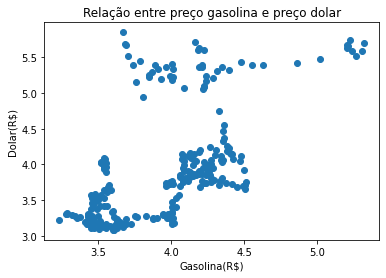

In [2279]:


plt.scatter(df_final[["preco_gasolina"]], df_final[["preco_dolar"]])
plt.xlabel("Gasolina(R$)")
plt.ylabel("Dolar(R$)")
plt.title("Relação entre preço gasolina e preço dolar")



# Pré-processamento

In [2280]:
#Blibliotecas especificas para o aprendizado de máquina

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor



In [2281]:
X = df_final[["preco_dolar"]]
Y = df_final[["preco_gasolina"]].values

In [2282]:
#Normalização
escala = StandardScaler() 
escala.fit(X)

X_norm = escala.transform(X)
# X_norm = X
X_norm

array([[ 0.11830526],
       [ 0.10321194],
       [ 0.18977434],
       [ 0.17350225],
       [ 0.00457999],
       [ 0.03406622],
       [ 0.10472383],
       [ 0.03248599],
       [-0.06137964],
       [-0.29154647],
       [-0.33024074],
       [-0.37633433],
       [-0.41803316],
       [-0.36914001],
       [-0.52253331],
       [-0.47265358],
       [-0.54695426],
       [-0.52061141],
       [-0.56863331],
       [-0.51379507],
       [-0.46147453],
       [-0.44763044],
       [-0.64302368],
       [-0.6021    ],
       [-0.71731154],
       [-0.84256822],
       [-0.81822414],
       [-0.85251085],
       [-0.85912219],
       [-0.85468901],
       [-0.89650957],
       [-1.0088767 ],
       [-0.94202018],
       [-0.91870111],
       [-0.88326127],
       [-0.88999432],
       [-0.8070515 ],
       [-0.89871335],
       [-0.89640707],
       [-0.91144914],
       [-0.93909889],
       [-0.97574313],
       [-1.02361127],
       [-0.92593387],
       [-0.84884643],
       [-0

In [2283]:
#Dividir  em conjunto de treinamento e teste 
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size= 0.3)

In [2284]:
rna = MLPRegressor(hidden_layer_sizes= (100, 50, 50, 25),
                   max_iter = 2000,
                   tol = 0.000000000001,
                   learning_rate_init = 0.01,
                   solver = "sgd",
                   activation = "relu",
                   learning_rate = "constant",
                   verbose = 2,)
# rna = MLPRegressor(hidden_layer_sizes= (50, 25),
#                    max_iter = 2000,
#                    tol = 0.0000001,
#                    learning_rate_init = 0.1,
#                    solver = "sgd",
#                    activation = "logistic",
#                    learning_rate = "constant",
#                    verbose = 2,)
rna.fit(X_norm_train, Y_train)                   

c:\Users\chris\Code\Faculdade\Gasolina-Petroleo-Dataset\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 7.54390845
Iteration 2, loss = 6.27929992
Iteration 3, loss = 4.66437680
Iteration 4, loss = 2.80123961
Iteration 5, loss = 0.88101826
Iteration 6, loss = 0.12521749
Iteration 7, loss = 0.96218477
Iteration 8, loss = 0.76946964
Iteration 9, loss = 0.24369574
Iteration 10, loss = 0.07679193
Iteration 11, loss = 0.08288475
Iteration 12, loss = 0.10905440
Iteration 13, loss = 0.10824779
Iteration 14, loss = 0.08933338
Iteration 15, loss = 0.07351307
Iteration 16, loss = 0.06923043
Iteration 17, loss = 0.07060833
Iteration 18, loss = 0.07046398
Iteration 19, loss = 0.06763134
Iteration 20, loss = 0.06437951
Iteration 21, loss = 0.06212531
Iteration 22, loss = 0.06066931
Iteration 23, loss = 0.05956037
Iteration 24, loss = 0.05838410
Iteration 25, loss = 0.05719766
Iteration 26, loss = 0.05615807
Iteration 27, loss = 0.05531485
Iteration 28, loss = 0.05463976
Iteration 29, loss = 0.05400828
Iteration 30, loss = 0.05339832
Iteration 31, loss = 0.05282146
Iteration 32, los

c:\Users\chris\Code\Faculdade\Gasolina-Petroleo-Dataset\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50, 50, 25), learning_rate_init=0.01,
             max_iter=2000, solver='sgd', tol=1e-12, verbose=2)

In [2285]:
reglinear = SGDRegressor(max_iter=5000,
                          tol = 0.0000001,
                         eta0= 0.1,
                         learning_rate="constant",
                         verbose=2,
                        )
reglinear.fit(X_norm_train, Y_train)                    

-- Epoch 1
Norm: 0.33, NNZs: 1, Bias: 4.034932, T: 188, Avg. loss: 0.275417
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.38, NNZs: 1, Bias: 4.019360, T: 376, Avg. loss: 0.063440
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.25, NNZs: 1, Bias: 3.918310, T: 564, Avg. loss: 0.063521
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.16, NNZs: 1, Bias: 4.014854, T: 752, Avg. loss: 0.063131
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.24, NNZs: 1, Bias: 3.852834, T: 940, Avg. loss: 0.062821
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.30, NNZs: 1, Bias: 3.886681, T: 1128, Avg. loss: 0.065959
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.26, NNZs: 1, Bias: 3.903590, T: 1316, Avg. loss: 0.061269
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.40, NNZs: 1, Bias: 4.003202, T: 1504, Avg. loss: 0.061677
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 1, Bias: 4.023752, T: 1692, Avg. loss: 0.064523
Total training time: 0.00 second

c:\Users\chris\Code\Faculdade\Gasolina-Petroleo-Dataset\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=5000, tol=1e-07,
             verbose=2)

# Pos- processamento

In [2286]:
#Previssão do conjunto de teste
Y_rna_previsao = rna.predict(X_norm_test)
Y_rl_previsao = reglinear.predict(X_norm_test)

In [2287]:
#Calcular o R^2
r2_rna = r2_score(Y_test,Y_rna_previsao)
r2_rl = r2_score(Y_test,Y_rl_previsao)

print("R2 RNA:", r2_rna)
print("R2 RL:", r2_rl)

R2 RNA: 0.474003312883834
R2 RL: 0.41135133424658876


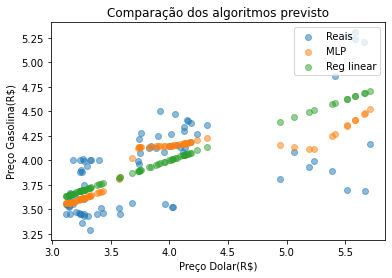

In [2295]:
X_test = escala.inverse_transform(X_norm_test)
plt.scatter(X_test, Y_test, alpha = 0.5, label="Reais")
plt.scatter(X_test, Y_rna_previsao, alpha = 0.5, label="MLP")
plt.scatter(X_test, Y_rl_previsao, alpha = 0.5, label="Reg linear")
plt.xlabel("Preço Dolar(R$)")
plt.ylabel("Preço Gasolina(R$)")
plt.title ("Comparação dos algoritmos previsto")
plt.legend(loc=1)

# Previsão de Preço

In [2289]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2016-01-10 to 2021-04-25
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   preco_gasolina  269 non-null    float64
 1   preco_dolar     269 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB


In [2290]:
from sklearn.linear_model import LinearRegression

In [2291]:
rates = {}
models = {}
#models['produto'] = reglinear
models['produto'] = rna
rates['2021-01-01'] = df_final['preco_dolar'].iloc[-1]
print(rates)
for i in range(2022, 2026):
    last_year = str(i - 1)+'-01-01'
    curr_year = str(i)+'-01-01'
    rates[curr_year]  = (rates[last_year] * 0.03) + rates[last_year]

rates_df = pd.DataFrame(list(rates.items()), columns = ['DATA', 'preco_dolar'])

rates_df['DATA'] = pd.to_datetime(rates_df['DATA'])
rates_df.set_index('DATA', inplace=True)
predictions = {}

rates_df['previsao_preco_gasolina'] = models['produto'].predict(rates_df)
rates_df

{'2021-01-01': 5.519325}


c:\Users\chris\Code\Faculdade\Gasolina-Petroleo-Dataset\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


,preco_dolar,previsao_preco_gasolina
DATA,,
2021-01-01,5.519325,6.473575
2022-01-01,5.684905,6.572401
2023-01-01,5.855452,6.673706
2024-01-01,6.031115,6.778026
2025-01-01,6.212049,6.885475


<AxesSubplot:xlabel='DATA INICIAL'>

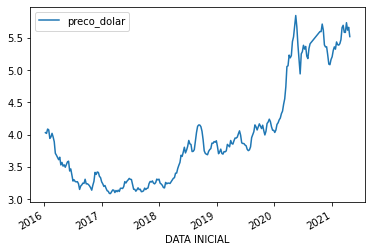

In [2292]:
df_final[["preco_dolar"]].plot()